testando previsao OD rio Piracicaba

In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 5.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 78.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:0

In [ ]:
# carregar matriz geral de dados
import io
import pandas as pd

from google.colab import files

uploaded = files.upload()

data = pd.read_csv((io.BytesIO(uploaded['rio_Piracicaba.csv'])), sep=";", decimal=",", header=0)

Saving rio_Piracicaba.csv to rio_Piracicaba.csv


In [ ]:
data

,Temp,pH,Turb,Fosf,NH3,Kje,NO3,NO2,DBO,Vazao,ppt,OD
0,27.0,7.2,42.00,0.151,0.22,0.93,0.37,0.09,6,306.0,0.0,6.2
1,25.0,7.2,45.00,0.140,0.26,1.08,0.36,0.13,3,175.0,0.0,5.4
2,17.0,7.0,13.00,0.183,0.12,0.99,0.71,0.09,3,92.0,0.0,6.0
3,18.0,6.9,17.00,0.107,0.22,1.04,0.51,0.13,6,85.0,1.0,4.0
4,25.0,6.9,10.00,0.213,1.00,2.04,0.44,0.17,6,68.0,12.6,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...
143,25.0,7.1,49.50,0.007,0.50,0.80,1.34,0.30,7,136.0,0.7,5.5
144,22.3,7.2,15.70,0.062,1.00,1.00,1.41,0.22,7,147.0,0.0,5.8
145,18.3,7.1,16.20,0.165,1.00,1.00,1.40,0.20,7,121.0,13.2,6.9
146,23.6,7.1,8.95,0.338,2.00,3.00,1.16,0.22,9,57.0,0.0,4.8


In [ ]:
data.columns

Index(['Temp', 'pH', 'Turb', 'Fosf', 'NH3', 'Kje', 'NO3', 'NO2', 'DBO',
       'Vazao', 'ppt', 'OD'],
      dtype='object')

In [ ]:
saida = data['OD']

In [ ]:
X = data.loc[:, ['Temp', 'pH', 'Turb', 'Fosf', 'NH3', 'Kje', 'NO3', 'NO2', 'DBO',
       'Vazao', 'ppt']]

In [ ]:
#escalonamento da matriz X

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=True, with_std=True)
X2 = pd.DataFrame(scaler.fit_transform(X))

In [ ]:
from pycaret.regression import *

modelo = setup(data = X2, target = saida, train_size = 0.86, remove_outliers=True, fold = 10)

,Description,Value
0,Session id,6477
1,Target,OD
2,Target type,Regression
3,Original data shape,"(148, 12)"
4,Transformed data shape,"(141, 12)"
5,Transformed train set shape,"(120, 12)"
6,Transformed test set shape,"(21, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models()  # erros de calibração

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,1.0260,1.9566,1.3268,0.4524,0.3078,0.5450,0.2070
et,Extra Trees Regressor,1.0160,1.9412,1.3283,0.4477,0.3123,0.5453,0.1850
lightgbm,Light Gradient Boosting Machine,1.0238,1.9991,1.3305,0.4372,0.3006,0.4738,0.1920
ada,AdaBoost Regressor,1.0686,2.0665,1.3755,0.4115,0.3218,0.5549,0.0890
gbr,Gradient Boosting Regressor,1.0548,2.1299,1.3827,0.3788,0.3062,0.4959,0.0910
br,Bayesian Ridge,1.1668,2.3550,1.4677,0.2975,0.3321,0.5548,0.0300
knn,K Neighbors Regressor,1.2177,2.5500,1.5418,0.2511,0.3573,0.6363,0.0320
omp,Orthogonal Matching Pursuit,1.3212,2.8053,1.6290,0.1872,0.3743,0.7029,0.0310
huber,Huber Regressor,1.2020,2.6607,1.5465,0.1733,0.3516,0.5889,0.0330
xgboost,Extreme Gradient Boosting,1.2095,2.7048,1.5926,0.1694,0.3390,0.5107,0.1000


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7092,0.9850,0.9925,0.6454,0.2490,0.2791
1,1.2812,4.2663,2.0655,0.2718,0.3192,0.2813
2,1.2413,1.9900,1.4107,0.3951,0.3063,0.3694
3,1.4592,3.8269,1.9563,-0.0993,0.5542,1.8106
4,0.7890,0.9986,0.9993,0.5121,0.2061,0.2255
5,0.8963,1.2781,1.1305,0.5417,0.2847,0.3949
6,0.6883,0.6030,0.7765,0.7445,0.1708,0.2026
7,1.1947,1.7826,1.3351,0.6213,0.3997,0.9732
8,0.7272,0.6808,0.8251,0.5989,0.1904,0.2454


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
tuned_br = tune_model(rf)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6366,0.6387,0.7992,0.7701,0.2027,0.2344
1,1.3237,4.4410,2.1074,0.2420,0.3241,0.3007
2,1.2116,1.9241,1.3871,0.4152,0.3131,0.3998
3,1.4297,3.7581,1.9386,-0.0795,0.5532,1.8107
4,0.7863,0.8559,0.9252,0.5818,0.1902,0.2203
5,0.9263,1.2782,1.1306,0.5416,0.2939,0.4191
6,0.7124,0.6990,0.8361,0.7038,0.1751,0.2030
7,1.2945,2.0977,1.4484,0.5544,0.4082,0.9749
8,0.7060,0.8826,0.9395,0.4800,0.2199,0.2622


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


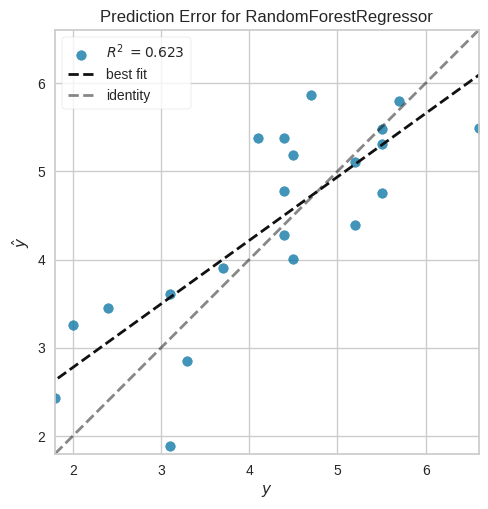

In [ ]:
plot_model(tuned_br, plot = 'error')